In [56]:
from google.colab import drive
drive.mount ('/content/drive')

from IPython.display import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Notch reject filter


In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/IMP301/PT3/images/1.png', 0)

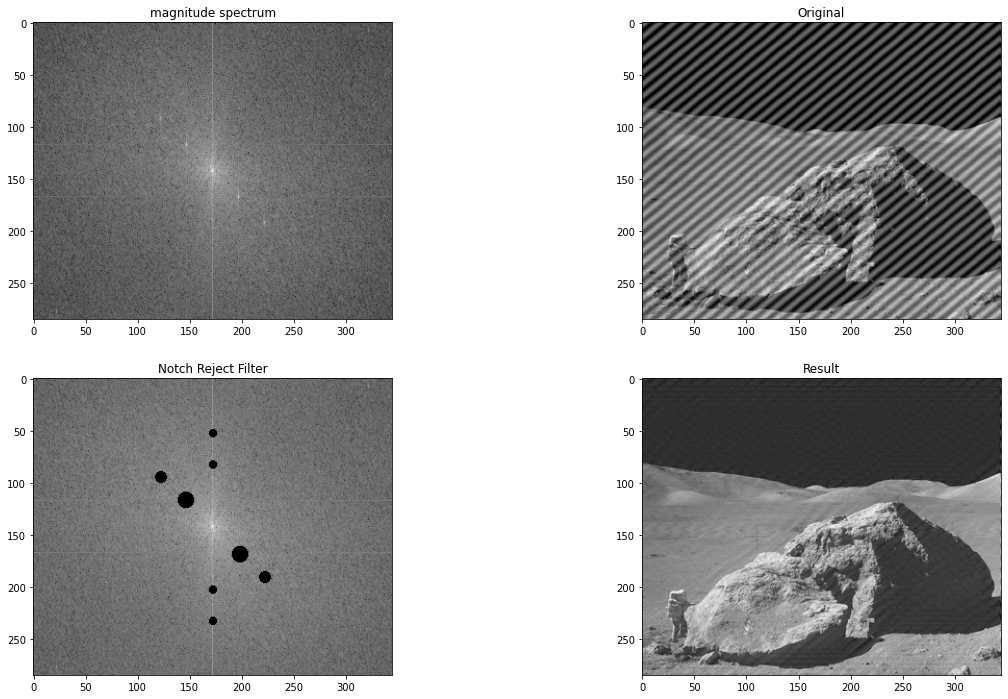

In [58]:



#------------------------------------------------------
def notch_reject_filter(shape, d0=9, u_k=0, v_k=0):
    P, Q = shape
    # Initialize filter with zeros
    H = np.zeros((P, Q))

    # Traverse through filter
    for u in range(0, P):
        for v in range(0, Q):
            # Get euclidean distance from point D(u,v) to the center
            D_uv = np.sqrt((u - P / 2 + u_k) ** 2 + (v - Q / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - P / 2 - u_k) ** 2 + (v - Q / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H
#-----------------------------------------------------




f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
phase_spectrumR = np.angle(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))

img_shape = img.shape

H1 = notch_reject_filter(img_shape, 8, 26, 26)
H2 = notch_reject_filter(img_shape, 4, -90, 0)
H3 = notch_reject_filter(img_shape, 6, 48, 50)
H4 = notch_reject_filter(img_shape, 4, 60, 0)
H5 = notch_reject_filter(img_shape, 4, -60, 0)
H6 = notch_reject_filter(img_shape, 4, 90, 0)

NotchFilter = H1*H2*H3*H4*H5*H6
NotchRejectCenter = fshift * NotchFilter 
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)  # Compute the inverse DFT of the result


Result = np.abs(inverse_NotchReject)
plt.figure(figsize=(20,12))
plt.subplot(222)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(221)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('magnitude spectrum')

plt.subplot(223)
plt.imshow(magnitude_spectrum*NotchFilter, "gray") 
plt.title("Notch Reject Filter")

plt.subplot(224)
plt.imshow(Result, "gray") 
plt.title("Result")


plt.show()

#2. Median adaptive filter

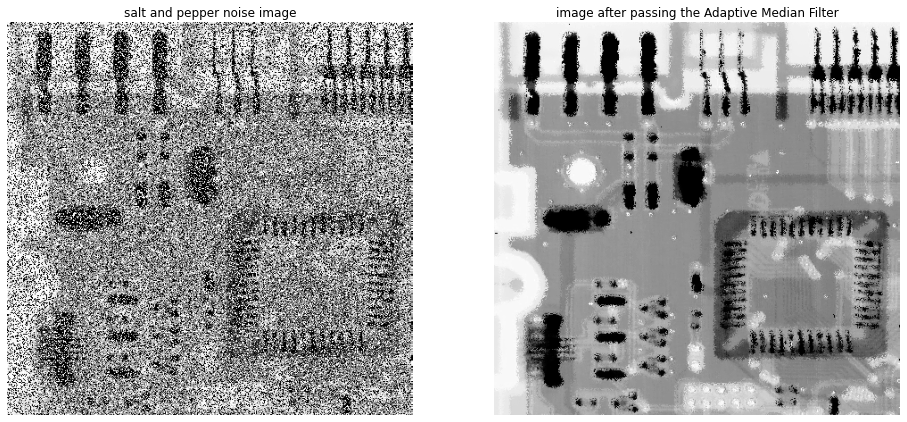

In [59]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def Median_ad_filter(img,ksize,Smax):    
    m,n = img.shape  
    img_filtered= np.zeros([m, n]) 
                                          
    h = (Smax-1)//2    
                       
    padded_img = np.pad(img,(h,h),mode='reflect')  
    for i in range(m):
        for j in range(n):
            k = ksize
            img_k_size = padded_img[i:i+k,j:j+k] 
                                                                     
            while True:
                
                A1 = np.median(img_k_size) - np.min(img_k_size)
                A2 = np.median(img_k_size) - np.max(img_k_size)
                if A1 > 0 and A2 <0:
                    
                    B1 = int(img[i, j]) - int(np.min(img_k_size))
                    B2 = int(img[i, j]) - int(np.max(img_k_size))
                    if B1>0 and B2 <0:
                        img_filtered[i,j] = img[i,j]
                    else:
                        img_filtered[i, j] = np.median(img_k_size)
                    break  #
                else: 
                    k += 1
                    Snew = k*2+1
                    if Snew <= Smax :
                        img_k_size = padded_img[i:i+k,j:j+k]
                    else :
                        img_filtered[i,j] = np.median(img_k_size)
                        break #
    return img_filtered

if __name__ == "__main__":
    img2 = cv2.imread('/content/drive/MyDrive/IMP301/PT3/images/2.png',0) 
    ksize=7   
    Smax=11    
    output_img = Median_ad_filter(img2,ksize, Smax)   

    fig = plt.figure(figsize=(16, 9))     
    ax1, ax2 = fig.subplots(1, 2)        
    ax1.imshow(img2, cmap='gray')     
    ax1.set_title("salt and pepper noise image")   
    ax1.axis("off")

    ax2.imshow(output_img, cmap='gray') 
    ax2.set_title("image after passing the Adaptive Median Filter") 
    ax2.axis("off")

    plt.show()



# 3. Median Filter

(-0.5, 283.5, 379.5, -0.5)

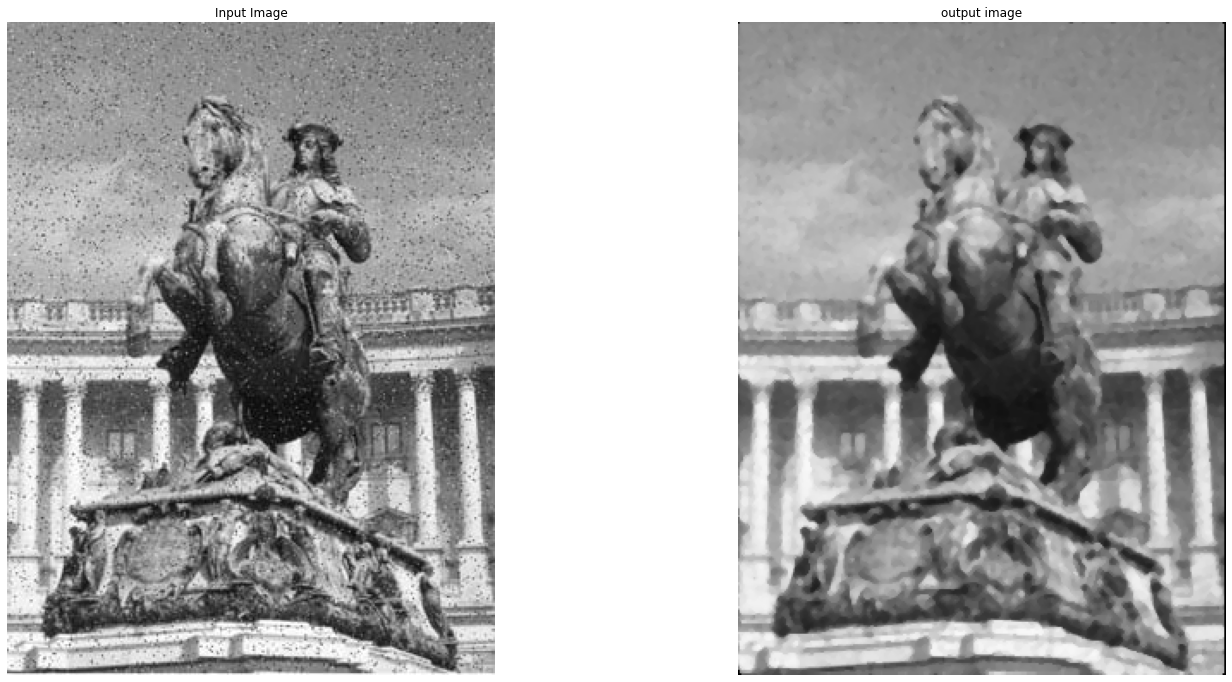

In [60]:
import numpy
from PIL import Image


def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final



img3 = Image.open("/content/drive/MyDrive/IMP301/PT3/images/3.png").convert("L")
arr = numpy.array(img3)
removed_noise = median_filter(arr, 3)
removed_noise = median_filter(removed_noise, 3)
removed_noise = median_filter(removed_noise, 3) 
img_output = Image.fromarray(removed_noise)
# plt.imshow(img, cmap = 'gray')
   
plt.figure(figsize = (24,12))
plt.subplot(121)  
plt.imshow(img3, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)  
plt.imshow(img_output, cmap='gray')
plt.title('output image')
plt.axis('off')



#4. Motion deblurring 


(-0.5, 284.5, 284.5, -0.5)

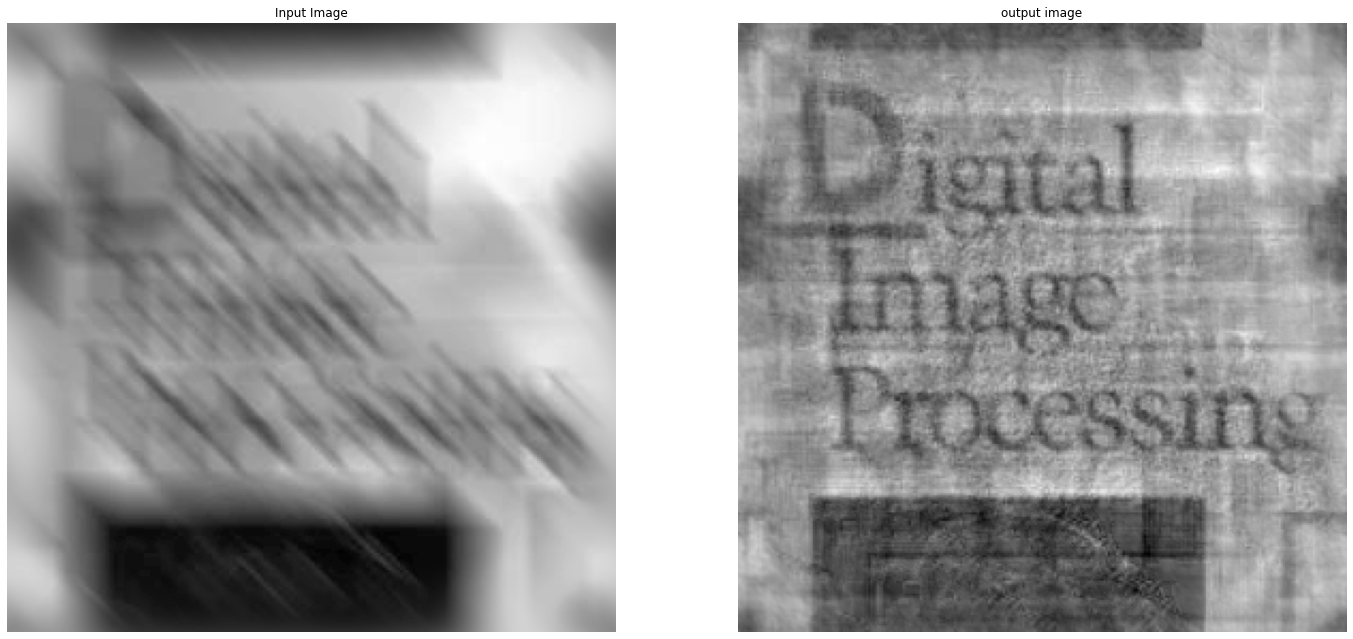

In [100]:
import cv2
import numpy as np


def blur_edge(img, d=31):
    h, w = img.shape[:2]
    img_pad = cv2.copyMakeBorder(img, d, d, d, d, cv2.BORDER_WRAP)
    img_blur = cv2.GaussianBlur(img_pad, (2*d+1, 2*d+1), -1)[d:-d, d:-d]
    y, x = np.indices((h, w))
    dist = np.dstack([x, w-x-1, y, h-y-1]).min(-1)
    w = np.minimum(np.float32(dist)/d, 1.0)
    return img*w + img_blur*(1-w)


def kernel_motion(angle, d, sz=65):
    kern = np.ones((1, d), np.float32)
    c, s = np.cos(angle), np.sin(angle)
    A = np.float32([[c, -s, 0], [s, c, 0]])
    sz2 = sz // 2
    A[:,2] = (sz2, sz2) - np.dot(A[:,:2], ((d-1)*0.5, 0))
    kern = cv2.warpAffine(kern, A, (sz, sz), flags=cv2.INTER_CUBIC)
    return kern



fn = '/content/drive/MyDrive/IMP301/PT3/images/4.png'
img = cv2.imread(fn, 0)

img = np.float32(img) / 255.0
img = blur_edge(img)

IMG = cv2.dft(img, flags=cv2.DFT_COMPLEX_OUTPUT)

ang = np.deg2rad(45)
d = 42
noise = 10**(-0.1*30)

psf = kernel_motion(ang, d)
psf /= psf.sum()
psf_pad = np.zeros_like(img)
kh, kw = psf.shape
psf_pad[:kh, :kw] = psf

PSF = cv2.dft(psf_pad, flags=cv2.DFT_COMPLEX_OUTPUT, nonzeroRows=kh)
PSF2 = (PSF**2).sum(-1)
iPSF = PSF / (PSF2 + noise)[..., np.newaxis]
RES = cv2.mulSpectrums(IMG, iPSF, 0)
res = cv2.idft(RES, flags=cv2.DFT_SCALE | cv2.DFT_REAL_OUTPUT)
res = np.roll(res, -kh//2, 0)
res = np.roll(res, -kw//2, 1)

plt.figure(figsize = (24,12))
plt.subplot(121)  
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)  
plt.imshow(res, cmap='gray')
plt.title('output image')
plt.axis('off')

#5.Image recovery


Text(0.5, 1.0, 'Filtered')

<Figure size 1080x1080 with 0 Axes>

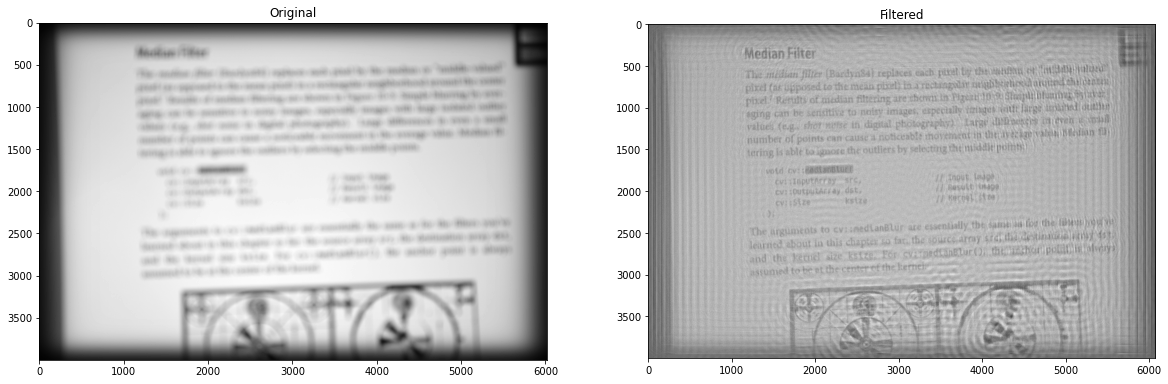

In [102]:
import cv2 as cv
import numpy as np

def calcPSF(size, R):
    
    h = np.zeros(size, dtype=np.float32)
    cv.circle(h,(size[1]//2,size[0]//2), R, 1, -1)
    psf = h/np.sum(h)
    
    return psf

def calcWnrFilter(psf, SNR):
    
    h_psf = np.fft.fftshift(psf)
    h_planes = [np.float32(h_psf), np.zeros(h_psf.shape, np.float32)]
    h_complexI = cv.merge(h_planes)
    h_complexI = cv.dft(h_complexI)
    h_planes = cv.split(h_complexI)
    denom = np.power(np.abs(h_planes[0]),2) + (1/SNR)
    wiener = np.divide(h_planes[0], denom, dtype = np.float32)

    return wiener

def filter2DFreq(img, wiener):
    
    planes = [np.float32(img), np.zeros(img.shape, np.float32)]
    complexI = cv.merge(planes)
    complexI = np.divide(cv.dft(complexI), complexI.size, dtype = np.float32)
    
    planesH = [np.float32(wiener), np.zeros(wiener.shape, np.float32)]
    complexH = cv.merge(planesH)
    complexIH = cv.mulSpectrums(complexI, complexH, 0)
    
    complexIH = cv.idft(complexIH)
    planes = cv.split(complexIH)
    out = planes[0]
    
    return out

def deBlur(img, R, SNR):
    
    rows, cols = img.shape
    m = cv.getOptimalDFTSize( rows )
    n = cv.getOptimalDFTSize( cols )
    img = (cv.copyMakeBorder(img, 0, m - rows, 0, n - cols, cv.BORDER_CONSTANT, value=[0, 0, 0])/255).astype(np.float32)
    
    h = calcPSF((m,n), R)
    Hw = calcWnrFilter(h, SNR)
    out = filter2DFreq(img, Hw)
    
    return out

img = cv.imread("/content/drive/MyDrive/IMP301/PT3/images/5.jfif",0)

plt.figure(figsize=(15,15))
v = deBlur(img,53,5200)
_, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(img, cmap='gray')
axes[0].set_title("Original")

axes[1].imshow(v, cmap='gray')
axes[1].set_title("Filtered")
# plt.imshow(img)
# plt.imshow(v, cmap='gray')

#6. image anti-aliasing

(-0.5, 449.5, 524.5, -0.5)

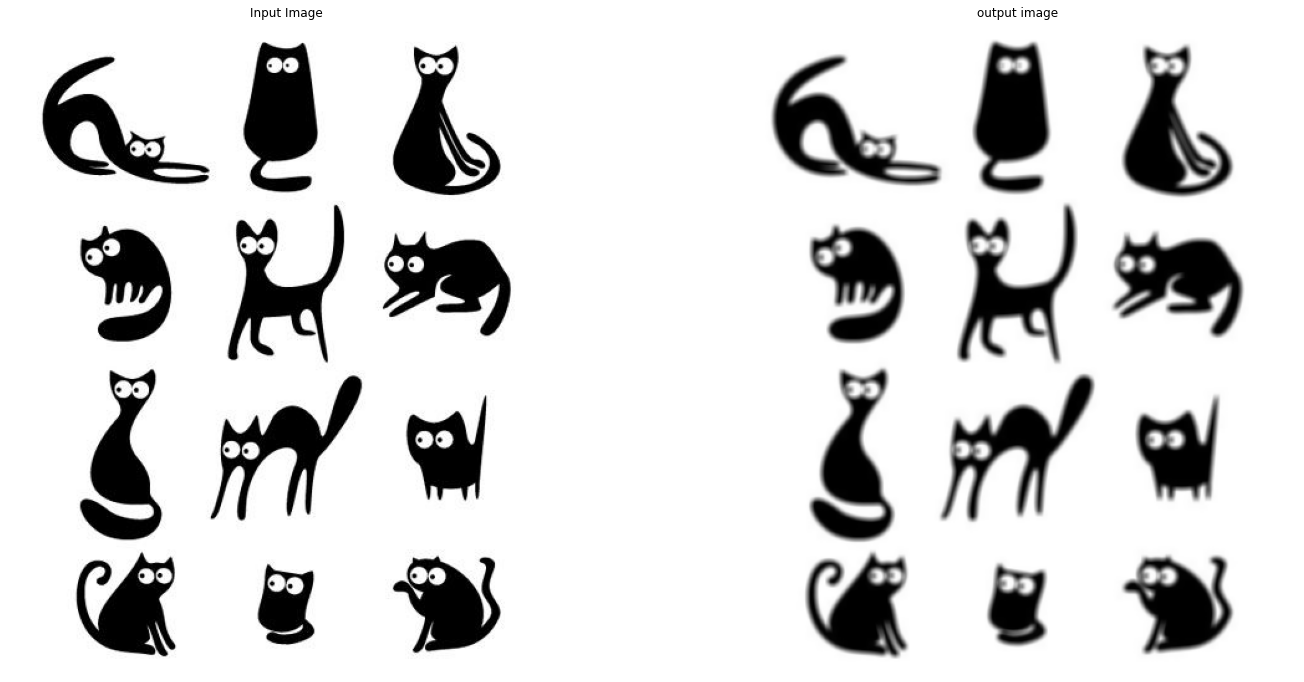

In [68]:
import cv2
import numpy as np
import skimage.exposure

# load image
img = cv2.imread('/content/drive/MyDrive/IMP301/PT3/images/6.jpg')

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray, 32, 255, cv2.THRESH_BINARY)[1]

# blur threshold image
blur = cv2.GaussianBlur(thresh, (0,0), sigmaX=3, sigmaY=3, borderType = cv2.BORDER_DEFAULT)

# stretch so that 255 -> 255 and 127.5 -> 0
stretch = skimage.exposure.rescale_intensity(blur, in_range=(127.5,255), out_range=(0,255)).astype(np.uint8)

# threshold again
thresh2 = cv2.threshold(stretch, 0, 255, cv2.THRESH_BINARY)[1]

# get external contour
contours = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
big_contour = max(contours, key=cv2.contourArea)

# draw white filled contour on black background
contour = np.zeros_like(thresh, dtype=np.uint8)
cv2.drawContours(contour, [big_contour], 0, 255, -1)

# dilate mask for dark border
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
mask = cv2.morphologyEx(contour, cv2.MORPH_DILATE, kernel)

# create red colored background image
bckgrnd = np.full_like(img, (0,0,255), dtype=np.uint8)

# apply mask to img
img_masked = cv2.bitwise_and(img, img, mask=mask)

# apply inverse mask to colored background image
bckgrnd_masked = cv2.bitwise_and(bckgrnd, bckgrnd, mask=255-mask)

# combine the two
result = cv2.add(img_masked, bckgrnd_masked)
# Creating the kernel with numpy
kernel2 = np.ones((5, 5), np.float32)/25
  
# Applying the filter
result= cv2.filter2D(src=result, ddepth=-1, kernel=kernel2)
# save output
plt.figure(figsize = (24,12))
plt.subplot(121)  
plt.imshow(img, cmap='gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122)  
plt.imshow(result, cmap='gray')
plt.title('output image')
plt.axis('off')

# Display various images to see the steps
